In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
# matplotlib inline #노트북에서 볼때
h2o.init()
h2o.no_progress

from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
#print(df.head())

feature = df.drop('target', axis=1)
label = df['target']

y = "target"
x = list(df.columns)
x.remove(y)

train, valid = train_test_split(df,
                                test_size=0.2,
                                shuffle=True)
h2o_train = h2o.H2OFrame(train)
h2o_valid = h2o.H2OFrame(valid)

h2o_train[y] = h2o_train[y].asfactor()
h2o_valid[y] = h2o_valid[y].asfactor()

aml = H2OAutoML(max_runtime_secs=120, exclude_algos =['XGBoost', 'StackedEnsemble'])
aml.train(x=x,y=y,training_frame=h2o_train, leaderboard_frame=h2o_valid)

leaderboard = aml.leaderboard
#performance = aml.leader.model_performance(h2o_valid)



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 day 15 hours 34 mins
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_Teon_szq0fn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.698 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
09:24:10.493: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.

██████████████████████████████████████████████████████████████| (done) 100%


In [15]:
print((aml.leader.model_performance(h2o_valid)))

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.032244669756326866
RMSE: 0.17956800872184017
LogLoss: 0.1375127878586356
Mean Per-Class Error: 0.030303030303030304
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error      Rate
---  ---  ---  ---------  ------
11   0    0    0          0 / 11
0    10   1    0.0909091  1 / 11
0    0    8    0          0 / 8
11   10   9    0.0333333  1 / 30

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.966667
2    1
3    1


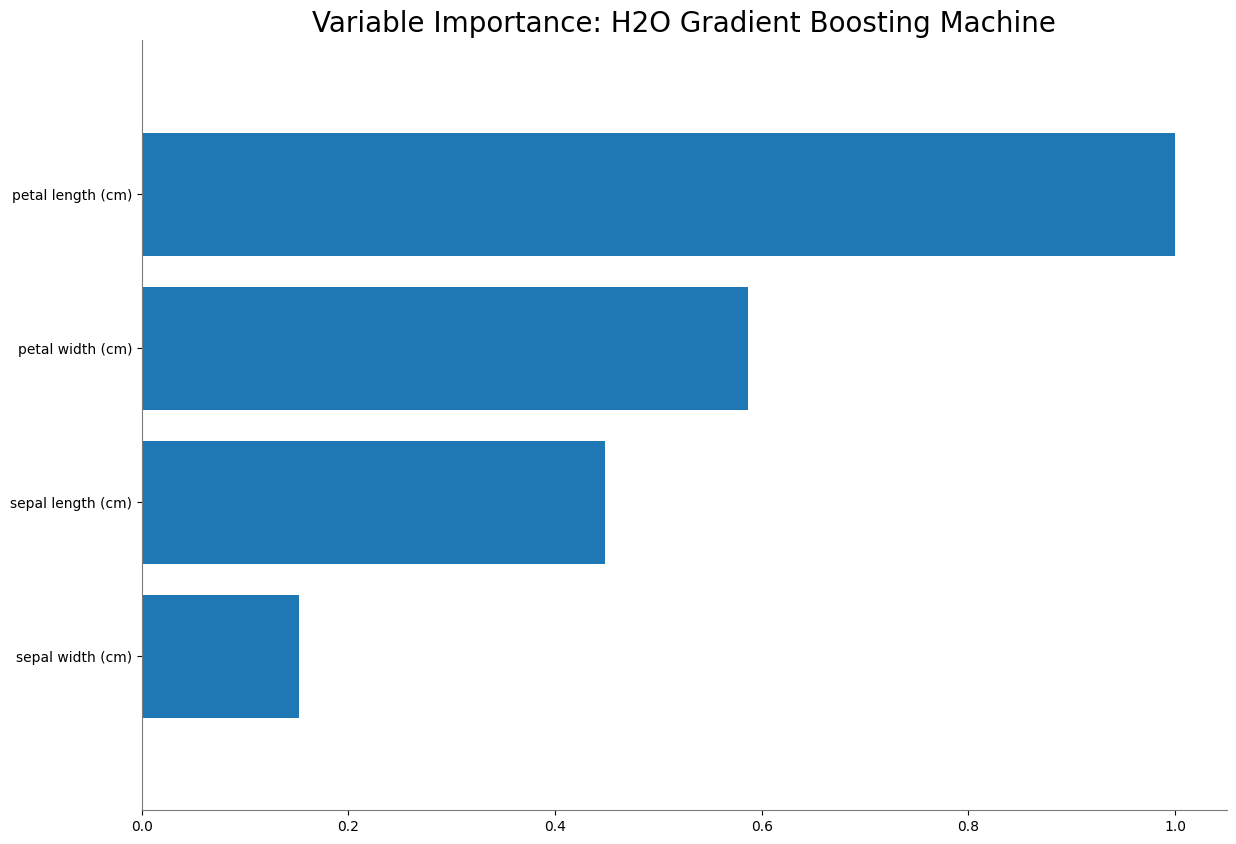

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
  predict
        1
        1
        1
        2
        0
        0
        0
        0
        1
        0
[30 rows x 1 column]



H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Column var1 not found
  Request: POST /99/Rapids
    data: {'ast': "(tmp= py_12_sid_bb1b (cols_py py_2_sid_bb1b 'var1'))", 'session_id': '_sid_bb1b'}


<Figure size 640x480 with 0 Axes>

In [16]:
## 중요 변수 시각화
aml.leader.varimp_plot()

## automl 결과 확인
# Get AutoML object by `project_name`
get_aml = h2o.automl.get_automl(aml.project_name)
# Predict with top model from AutoML Leaderboard on a H2OFrame called 'test'
label_predicted = get_aml.predict(h2o_valid)
print(label_predicted['predict'])
print(h2o_valid['var1'])